In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# EXPLORATORY DATA ANALYSIS

### Importing Dataset to get information about different types of Brain Tumor

In [2]:
df=pd.read_csv("E:\Datasets\Brain Tumor\Brain_GSE50161.csv")
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


### Extracting Columns to easily perform EDA

In [3]:
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54677)

In [4]:
df['type']

0                 ependymoma
1                 ependymoma
2                 ependymoma
3                 ependymoma
4                 ependymoma
               ...          
125    pilocytic_astrocytoma
126    pilocytic_astrocytoma
127    pilocytic_astrocytoma
128    pilocytic_astrocytoma
129    pilocytic_astrocytoma
Name: type, Length: 130, dtype: object

### Grouping data as per Type of the Brain Tumor

In [5]:
grp=df.groupby("type").mean()
grp

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
type,,,,,,,,,,,,,,,,,,,,,
ependymoma,856.5,12.757993,8.574604,7.961404,9.185998,4.394862,8.167767,6.721387,6.715342,6.074168,...,12.192026,11.640675,13.764821,13.610366,5.198662,4.820491,3.875701,3.698322,4.624857,4.588571
glioblastoma,896.5,12.416854,9.248950,8.205626,9.221384,4.872213,8.082259,6.646216,6.264813,6.423971,...,12.312384,11.748536,13.704094,13.510312,5.233977,4.820011,3.944229,3.663388,4.614859,4.636021
medulloblastoma,924.5,11.186921,9.095945,6.943021,8.954618,4.551997,7.366364,6.879751,6.626279,5.591145,...,12.606375,12.035456,13.805276,13.613053,5.158424,4.724502,3.940021,3.733740,4.685119,4.639823
normal,942.0,11.309117,8.038706,7.073371,9.066114,6.048279,7.456813,7.352496,5.923572,5.520755,...,12.793798,12.258869,14.093951,13.918832,5.299324,4.842685,3.969897,3.757622,4.599011,4.765121
pilocytic_astrocytoma,956.0,12.917306,8.435716,7.601755,9.325545,5.525233,8.425183,6.794821,6.448322,6.424275,...,12.341727,11.774123,13.810024,13.641057,5.155788,4.866641,3.900544,3.702048,4.608010,4.641159


### Counting number of cases in each type of Brain tumor to plot a basic bar graph between them

In [6]:
sr=df.value_counts(df['type'])
sr

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
dtype: int64

<BarContainer object of 5 artists>

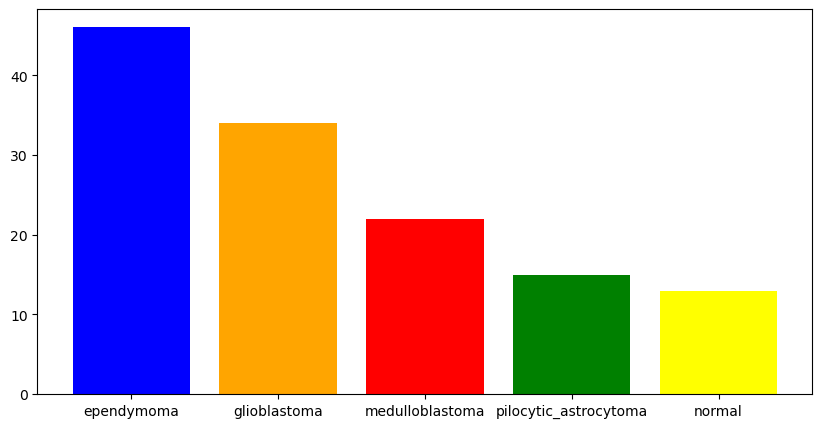

In [7]:
x=np.array(['ependymoma','glioblastoma','medulloblastoma','pilocytic_astrocytoma','normal'])
y=np.array([46,34,22,15,13])
color=['blue','orange','red','green','yellow']
plt.figure(figsize=(10,5))
plt.bar(x,y,color=color)

### Importing another dataset to get information about PRS type of brain cancer that are Primary and Recurrent

In [8]:
df1=pd.read_csv("E:\Datasets\Brain Tumor\Sample.csv")
df1

,CGGA_ID,PRS_type,Histology,Grade,Gender,Age,OS,Censor,Radio_status,Chemo_status,IDH_mutation_status,codeletion_status
0,CGGA_1002,Primary,AA,WHO III,Female,43.0,305.0,1.0,1.0,1.0,Wildtype,Non-codel
1,CGGA_1003,Primary,O,WHO II,Female,47.0,3428.0,0.0,0.0,1.0,Mutant,Codel
2,CGGA_1010,Primary,A,WHO II,Male,45.0,246.0,1.0,1.0,1.0,Mutant,NaN
3,CGGA_1012,Recurrent,rO,WHO II,Male,45.0,3407.0,0.0,1.0,1.0,Mutant,Non-codel
4,CGGA_1014,Primary,A,WHO II,Male,42.0,263.0,1.0,0.0,1.0,Wildtype,Non-codel
...,...,...,...,...,...,...,...,...,...,...,...,...
688,CGGA_P87,Recurrent,rGBM,WHO IV,Male,32.0,240.0,1.0,1.0,1.0,Mutant,Non-codel
689,CGGA_P89,Recurrent,rGBM,WHO IV,Male,42.0,294.0,1.0,1.0,1.0,Wildtype,Non-codel
690,CGGA_P93,Primary,A,WHO II,Female,45.0,1310.0,0.0,0.0,0.0,Mutant,Non-codel
691,CGGA_P98,Recurrent,rAA,WHO III,Male,44.0,317.0,1.0,1.0,1.0,Mutant,Non-codel


### Grouping the data as per PRS type & counting the value in each case to plot a pie chart amongst different types of PRS type

In [9]:
prs=df1.groupby('PRS_type').mean()
prs

C:\Users\Ritvik Sharma\AppData\Local\Temp\ipykernel_4080\2054000484.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prs=df1.groupby('PRS_type').mean()


,Age,OS,Censor,Radio_status,Chemo_status
PRS_type,,,,,
Primary,44.049881,1277.797066,0.501217,0.806045,0.716456
Recurrent,42.092251,755.173745,0.676923,0.840000,0.816901


In [10]:
sr=df1.value_counts(df1['PRS_type'])
sr

PRS_type
Primary      422
Recurrent    271
dtype: int64

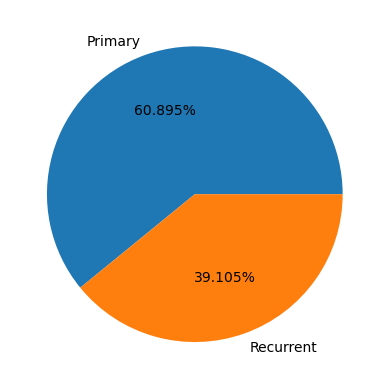

In [11]:
y=np.array([422,271])
mylabels=['Primary','Recurrent']
plt.pie(y,labels=mylabels,autopct="%0.3f%%")
plt.show()

### Importing another dataset to get the past background of the patient

In [12]:
df2=pd.read_csv("E:\Datasets\Brain Tumor\SampleDSF.csv")
df2

,ID,GENDER,AGE,ETHINICITY,RACE,BIOPSY_SITE,LOCATION_ORIGIN,GRADE,MORPHOLOGY,HISTOLOGY,...,BEHAVIOUR_CHANGE,SENSORY_CHANGE,DIABETES,ASTHMA_HISTORY,FAMILY_CANCER_HISTORY,FAM_BT_HISTORY,SMOK_HISTORY,WALKING_CHANGE,ALCOHOL_HISTORY,FIRST_SYMPTOM
0,1,Male,25,Not Hispanic or LatiNo,white,Cerebrum,Cerebrum,2,9450/3,Oligodendroglioma,...,Yes,NaN,Yes,NaN,NaN,NaN,Yes,Yes,NaN,NaN
1,2,Male,25,Not Hispanic or LatiNo,white,Cerebrum,Cerebrum,2,9450/3,Oligodendroglioma,...,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Seizures
2,3,Female,54,Not Hispanic or LatiNo,white,Cerebrum,Cerebrum,2,9451/3,"Oligodendroglioma, anaplastic",...,Yes,NaN,Yes,No,NaN,NaN,Yes,Yes,No,Headaches
3,4,Female,54,Not Hispanic or LatiNo,white,Cerebrum,Cerebrum,2,9451/3,"Oligodendroglioma, anaplastic",...,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Mental Status Changes
4,5,Male,39,Not Hispanic or LatiNo,white,Brain,Brain,3,9401/3,"Astrocytoma, anaplastic",...,Yes,NaN,Yes,NaN,NaN,NaN,Yes,Yes,NaN,Seizures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,8252,Male,47,Not Hispanic or LatiNo,american indian or alaska native,Cerebrum,Cerebrum,2,9450/3,Oligodendroglioma,...,No,No,No,No,No,No,Yes,Yes,No,Seizures
8252,8253,Male,44,Not Hispanic or LatiNo,white,Cerebrum,Cerebrum,3,9400/3,Astrocytoma,...,No,Yes,No,No,Yes,No,Yes,Yes,No,Seizures
8253,8254,Male,44,Hispanic or LatiNo,white,Cerebrum,Cerebrum,3,9400/3,Astrocytoma,...,No,Yes,No,No,No,No,Yes,Yes,No,Headaches
8254,8255,Female,42,Hispanic or LatiNo,white,Brain,Brain,2,9450/3,Oligodendroglioma,...,No,Yes,No,No,Yes,No,Yes,Yes,No,Sensory Changes


### Finding the most affected part of brain by the tumor

In [13]:
a=df2.groupby('BIOPSY_SITE').mean()
a

C:\Users\Ritvik Sharma\AppData\Local\Temp\ipykernel_4080\416072001.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=df2.groupby('BIOPSY_SITE').mean()


,ID,AGE,GRADE
BIOPSY_SITE,,,
Brain,4178.285714,42.642857,2.892857
Cerebrum,4126.107143,43.183036,2.839286
Frontal lobe,4044.500000,50.000000,3.500000
Parietal lobe,3895.500000,44.000000,4.000000
Temporal lobe,3976.166667,26.666667,3.333333


### Counting the cases of each affected part of the brain for plotting the graph

In [14]:
vc=df2.value_counts(df2['BIOPSY_SITE'])
vc

BIOPSY_SITE
Cerebrum         7168
Brain             896
Temporal lobe      96
Frontal lobe       64
Parietal lobe      32
dtype: int64

<BarContainer object of 5 artists>

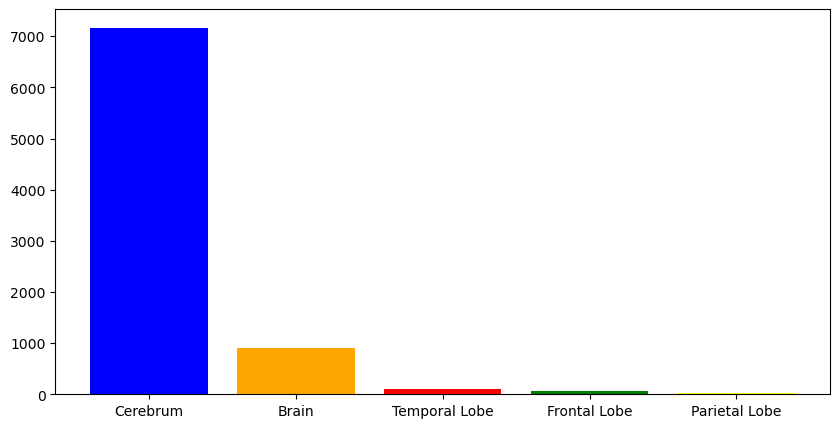

In [15]:
x=np.array(['Cerebrum','Brain','Temporal Lobe','Frontal Lobe','Parietal Lobe'])
y=np.array([7168,896,96,64,32])
color=['blue','orange','red','green','yellow']
plt.figure(figsize=(10,5))
plt.bar(x,y,color=color)

### Grouping the data as per Diabetes background and finding out that only 29.57% patients are with Diabetic History  

In [16]:
df2.groupby('DIABETES').mean()

C:\Users\Ritvik Sharma\AppData\Local\Temp\ipykernel_4080\3167794369.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('DIABETES').mean()


,ID,AGE,GRADE
DIABETES,,,
No,6192.5,42.988372,2.860465
Yes,2064.5,42.988372,2.860465


### Similarly finding out about the Family Cancer History to read the Trend of family genetics 

In [17]:
sr=df2.value_counts(df2['FAMILY_CANCER_HISTORY'])
sr

FAMILY_CANCER_HISTORY
No      3360
Yes     2112
Ukwn    1392
dtype: int64

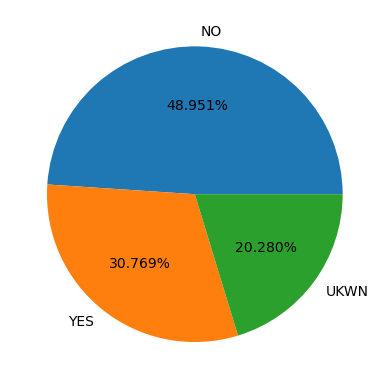

In [18]:
y=np.array([3360,2112,1392])
mylabels=['NO','YES','UKWN']
plt.pie(y,labels=mylabels,autopct="%0.3f%%")
plt.show()

### Pair plotting different terms differentiating by Type of Brain Cancer

In [19]:
cols=['type','1007_s_at', '1053_at', '117_at', '121_at','1255_g_at', '1294_at', '1316_at', '1320_at']
df[cols]

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
0,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999
1,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549
2,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156
3,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285
4,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387
...,...,...,...,...,...,...,...,...,...
125,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978
126,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812
127,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945
128,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710


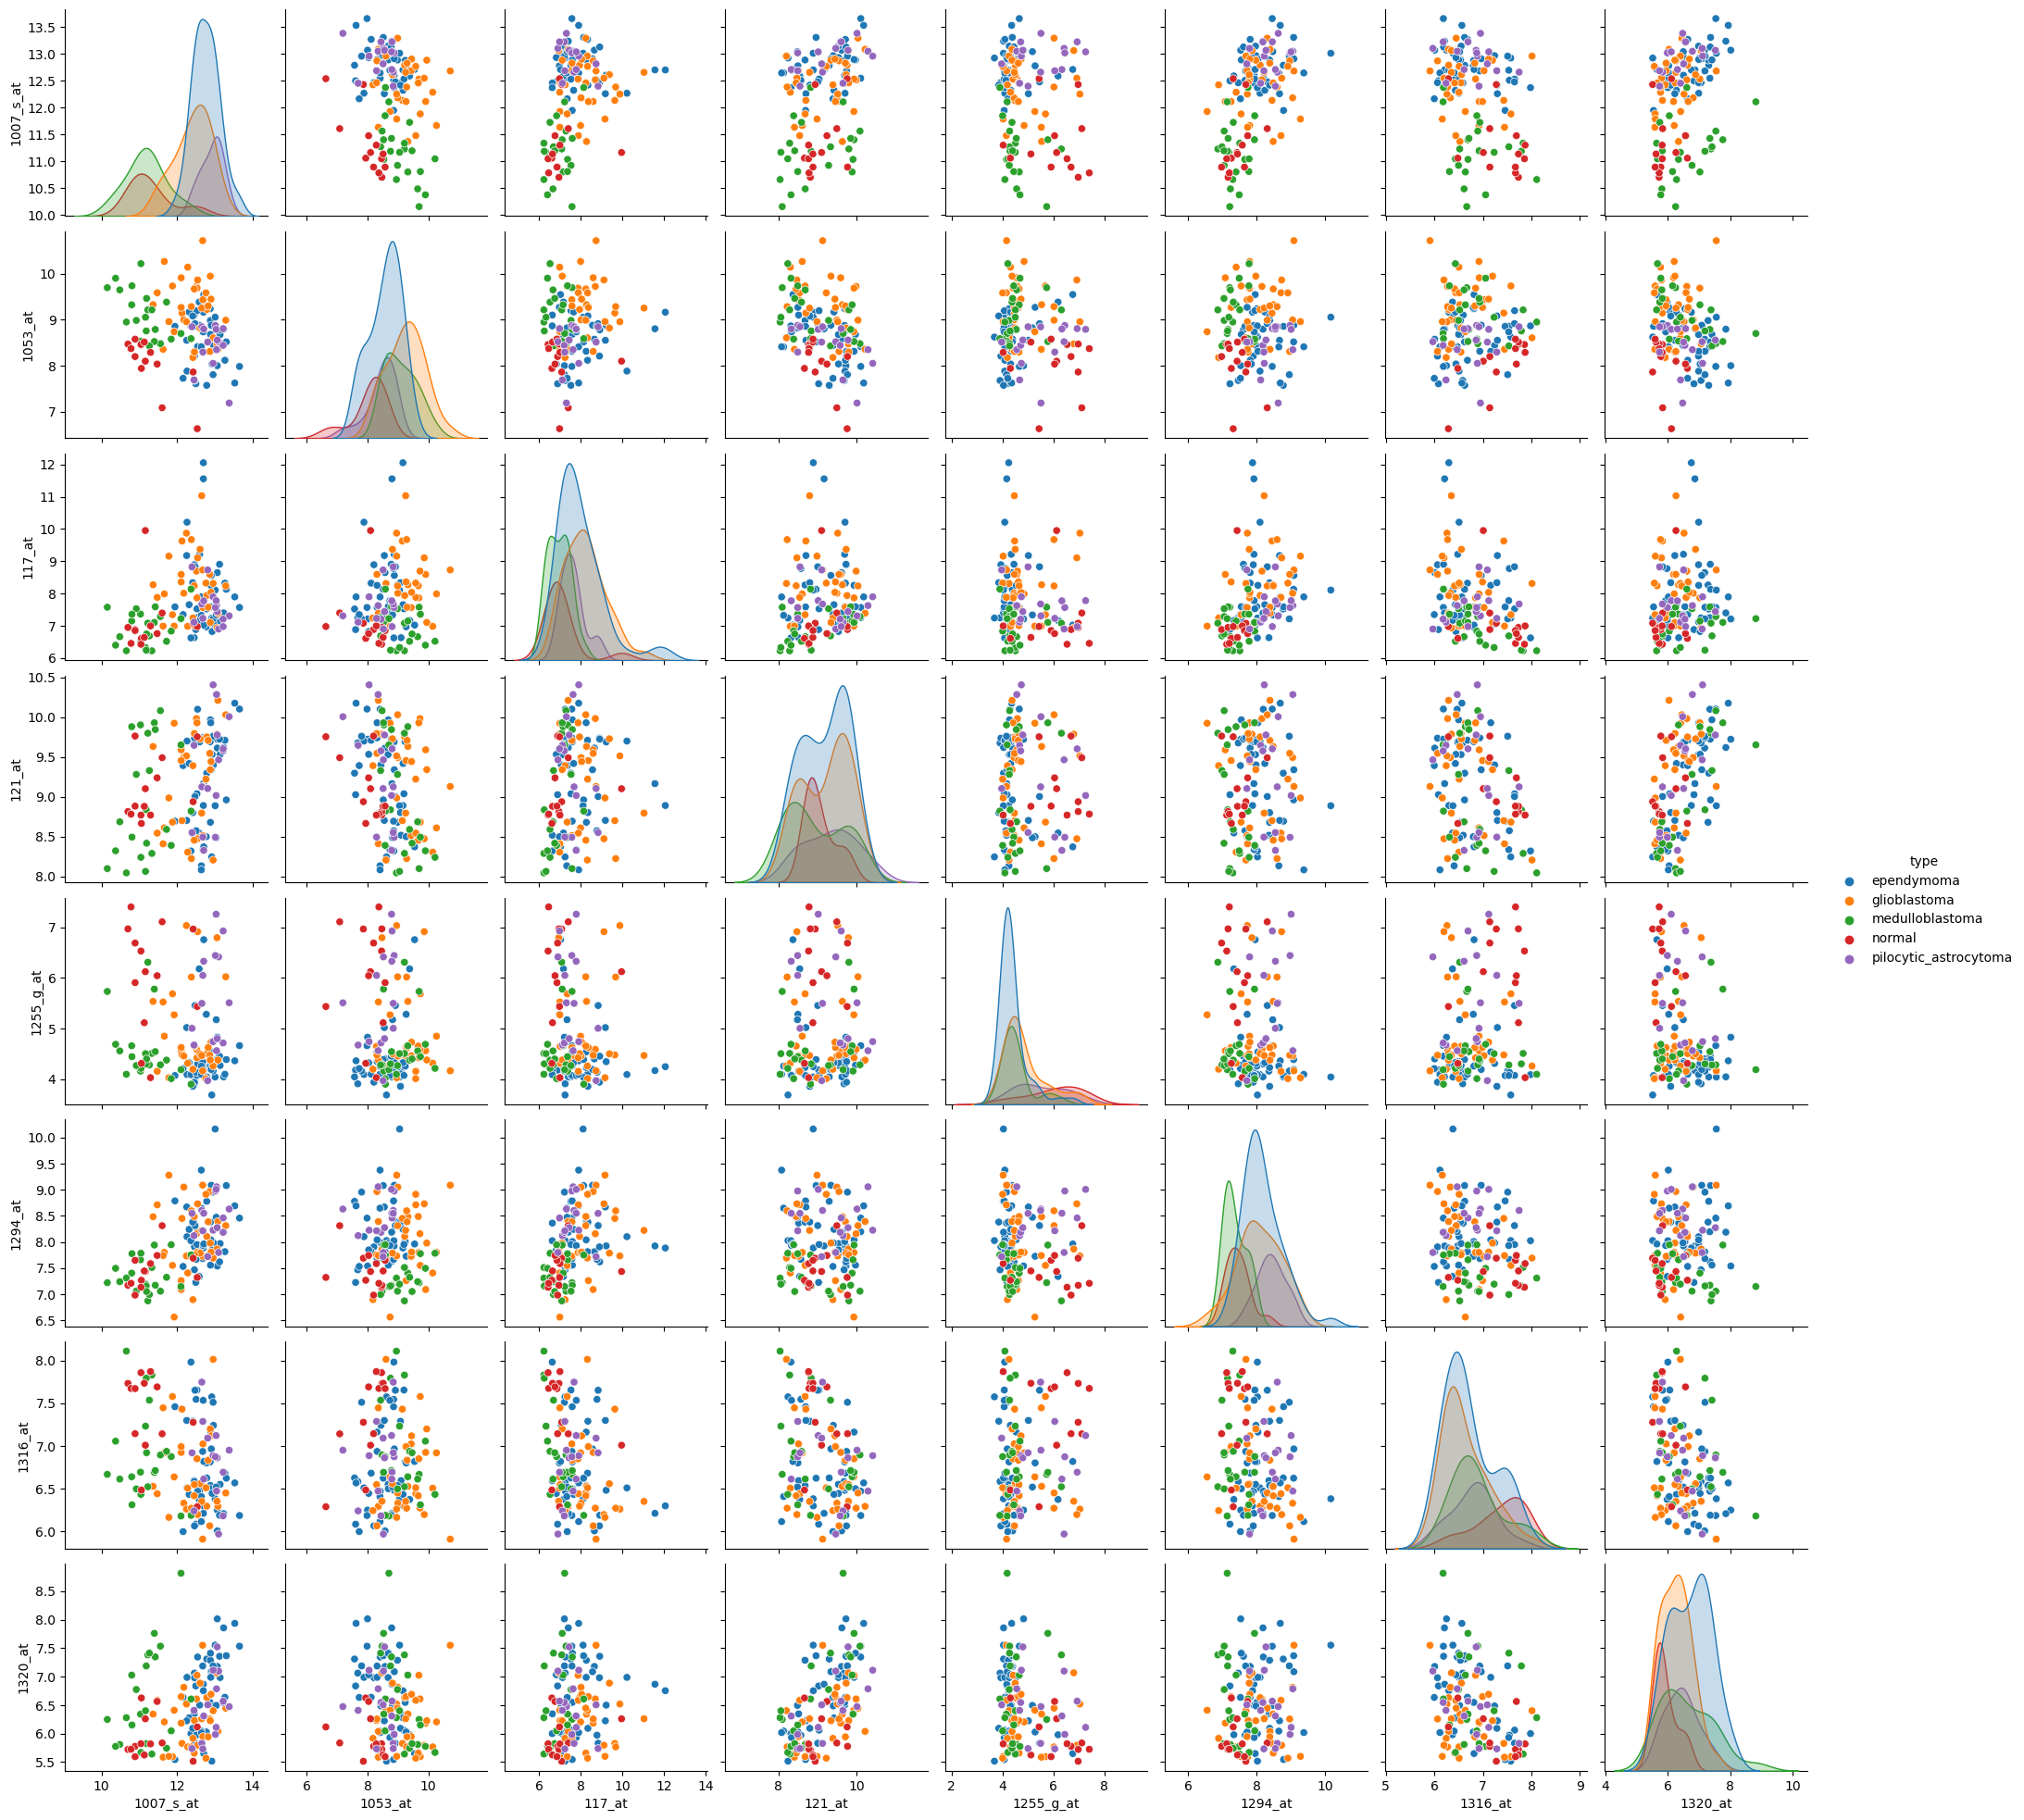

In [20]:
sns.pairplot(data=df[cols],hue='type')

### To analyze the trend of change of walk of a patient we found that 100% of patients are observed with change of walk after getting affected by the Brain Tumor

In [21]:
vc=df2.value_counts(df2['WALKING_CHANGE'])
vc

WALKING_CHANGE
Yes    8256
dtype: int64

<BarContainer object of 2 artists>

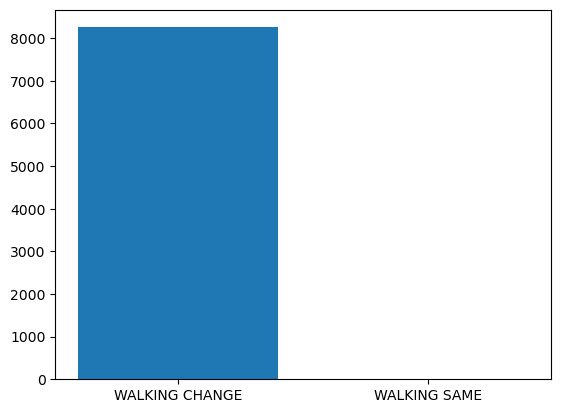

In [22]:
x=np.array(['WALKING CHANGE','WALKING SAME'])
y=np.array([8256,0])
plt.bar(x,y)

# BRAIN TUMOR DETECTION ML MODEL VIA DEEP CNN IMAGE CLASSIFICATION

### Loading of image dataset within the same directory

Directory of the image dataset is 'ImageDataset' which has two subfolders 'Negative' and 'Positive' with respective data in them.
As per the code only 'jpeg','jpg','png' iamges are allowed to get loaded

In [23]:
data_dir='ImageDataset'
data_dir

'ImageDataset'

In [24]:
os.listdir(data_dir)

['negative', 'positive']

In [25]:
img_ext=['jpeg','jpg','png']

In [26]:
for i in os.listdir(data_dir):
    for j in os.listdir(os.path.join(data_dir,i)):
        image_path=os.path.join(data_dir,i,j)
        print(j)

0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
5.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
6.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
7.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
8.jpg
80.jpg
81.jpg
82.jpg
83.jpg
84.jpg
85.jpg
86.jpg
87.jpg
88.jpg
89.jpg
9.jpg
90.jpg
91.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
97.jpg
0.jpg
1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
11.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.j

### Reading our image as an Numpy Array

This is done to get useful information from the image like size in pixels and channels
The 3 channel image that is read is 442px wide and 442px in height

In [27]:
img=cv2.imread(os.path.join('ImageDataset','positive','30.jpg'))
img

array([[[ 13,  31,  30],
        [ 16,  34,  33],
        [ 20,  34,  33],
        ...,
        [ 16,  22,  21],
        [ 20,  28,  27],
        [ 19,  27,  26]],

       [[  7,  25,  24],
        [ 31,  47,  46],
        [  8,  22,  21],
        ...,
        [ 18,  31,  29],
        [ 17,  30,  28],
        [ 12,  26,  24]],

       [[ 32,  48,  47],
        [159, 175, 174],
        [174, 188, 187],
        ...,
        [133, 156, 152],
        [122, 145, 141],
        [114, 139, 135]],

       ...,

       [[  1,   7,   6],
        [ 35,  41,  40],
        [ 12,  18,  17],
        ...,
        [  3,   9,   8],
        [ 14,  20,  19],
        [  6,  12,  11]],

       [[ 38,  43,  42],
        [ 28,  34,  33],
        [ 17,  22,  21],
        ...,
        [ 17,  23,  22],
        [ 31,  36,  35],
        [ 22,  28,  27]],

       [[ 23,  25,  25],
        [ 18,  23,  22],
        [ 37,  39,  39],
        ...,
        [ 11,  16,  15],
        [ 13,  15,  15],
        [  3,   8,   7]]

In [81]:
type(img)

numpy.ndarray

In [83]:
img.shape

(442, 442, 3)

### Reading the image

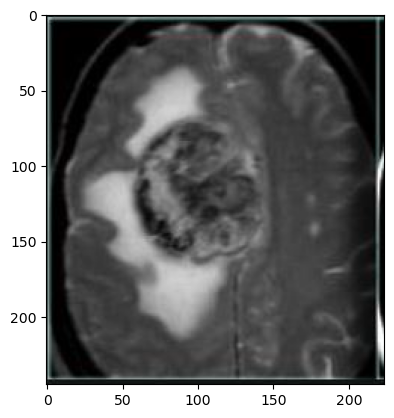

In [28]:
plt.imshow(img)

### Load Data

In [29]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

Keras utils allow us to read the dataset from the directory

In [30]:
data=tf.keras.utils.image_dataset_from_directory('ImageDataset',shuffle=True)

Found 227 files belonging to 2 classes.


We simply cannot grab the data, we need to use the iterator which allow us to retrieve the data from our pipeline, This retrieved data is set up on a batch and each time we iterate the data we get different batch of the data. This process helps a lot when we have massive amount of the data. The batch made is made randomly by shuffling data from different subfolders which are identified later by looking at them.

In [31]:
data_iterator=data.as_numpy_iterator()
data_iterator

In [32]:
batch=data_iterator.next()

By default a batch of 32 images is made of size 256x256 

In [33]:
batch[0].shape

(32, 256, 256, 3)

In [34]:
batch[1]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

Different plots are made by different folders that are identified

For the below results we can see that 
Images with Plot 1: BRAIN WITH TUMOR
Images with Plot 0: BRAIN WITHOUT TUMOR 

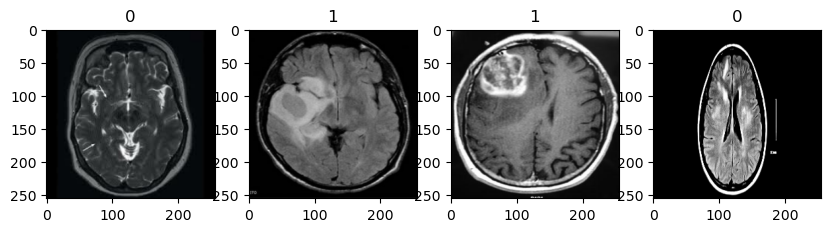

In [35]:
fig, ax=plt.subplots(ncols=4,figsize=(10,10))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [36]:
print('1 - Brain with Tumor')
print('0 - Brain without Tumor')

1 - Brain with Tumor
0 - Brain without Tumor


### Preprocessing the dataset

Preprocessing is done to scale the image value between 0 and 1 instead of 0 to 255 which helps our model to generalize and predicts faster and better

In [37]:
scale=batch[0]/255
scale.max()

1.0

In [38]:
scale.min()

0.0

Map allows to apply particular type of transformation, It speeds up how quiclky we can access our data

In [39]:
data=data.map(lambda x,y: (x/255,y))
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Applying the iterator on the scaled datset so to retrieve the data from our pipeline.

In [40]:
scaled_iterator=data.as_numpy_iterator()

In [41]:
scaled_iterator.next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [42]:
batch=scaled_iterator.next()

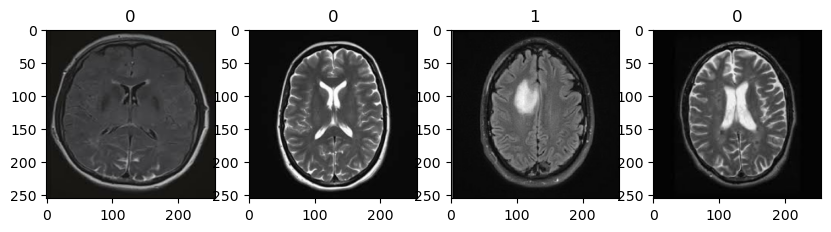

In [43]:
fig, ax=plt.subplots(ncols=4,figsize=(10,10))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Splitting the data

Splitting of data into Training and Testing partition as when it comes to validation our data we have a specefic part of our dataset which can be validated. To establish this we first need to define our training sizes of the data which depends upon the length of the data batch 

In [44]:
len(data)

8

Training set to be 70% of the batch data,
Value set to be 20% of the batch data,
Testing set to be 10% of the batch data.

The training, value and testing set must be equal to the lenght of batch data else we must modify it as per our need.

In [45]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [46]:
train_size

5

In [47]:
val_size

2

In [48]:
test_size

1

In [49]:
train_size+val_size+test_size

8

In [50]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [51]:
len(test)

1

### Building Deep Learning Model

API - Keras Sequential, which is best for single data input and output where data flolws from top to bottom. Layers- Conv2D which is a 2D Convulational Neural Network layer, MaxPooling 2D for condensing down our images based on region, Dense, Flatten that allows us to go through Convulational layer 

We need to build architecture with bunch of layers  which will form a Deep Neural Network

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [53]:
model=Sequential()

Creating our layers, The first layer is the input layer which will take image as input which is to be processed with 16 filter which helps in condensing and extracting relevant information from the image. Relu activation is used to conserve the positive value from the image that hellps to convert -ve value to 0 and positive remains unchanged 

In [54]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Optimizing is the technique to reduce error by tuning various parameters. ADAM - Adaptive Moment Estimation that is extention of RMS and Momentum

In [55]:
tf.optimizers.Adam

keras.src.optimizers.adam.Adam

In [56]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Training our data

In [58]:
logdir='logs'

In [59]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

Epochs refers to the number of times a machine learning model iterates over the entire training dataset during training. Fit is the training component

In [60]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 12s 2s/step - loss: 0.7151 - accuracy: 0.6187 - val_loss: 0.5605 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 0.5389 - accuracy: 0.7812 - val_loss: 0.4227 - val_accuracy: 0.8125
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.4865 - accuracy: 0.7750 - val_loss: 0.4862 - val_accuracy: 0.7656
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.3890 - accuracy: 0.8313 - val_loss: 0.3794 - val_accuracy: 0.8750
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 0.3684 - accuracy: 0.8750 - val_loss: 0.3118 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 0.3634 - accuracy: 0.8438 - val_loss: 0.2366 - val_accuracy: 0.9375
Epoch 7/20
5/5 [==============================] - 8s 2s/step - loss: 0.2815 - accuracy: 0.8938 - val_loss: 0.2359 - val_accuracy: 0.9219
Epoch 8/20
5/5 [========================

Extracting values of losses and accuracy obtained by training of the data. As the loss goes down the accuracy increases

In [61]:
hist.history

{'loss': [0.7151063680648804,
  0.5388613939285278,
  0.4865231513977051,
  0.38904839754104614,
  0.3683924078941345,
  0.3633643686771393,
  0.2814684510231018,
  0.20968487858772278,
  0.14657941460609436,
  0.13335958123207092,
  0.07116919755935669,
  0.055287666618824005,
  0.02308947779238224,
  0.012475842610001564,
  0.003998712636530399,
  0.008580369874835014,
  0.002667774213477969,
  0.002095118397846818,
  0.006737013813108206,
  0.005564775317907333],
 'accuracy': [0.6187499761581421,
  0.78125,
  0.7749999761581421,
  0.831250011920929,
  0.875,
  0.84375,
  0.893750011920929,
  0.9375,
  0.9375,
  0.956250011920929,
  0.987500011920929,
  0.987500011920929,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9937499761581421,
  1.0],
 'val_loss': [0.5604737997055054,
  0.4226652681827545,
  0.48618757724761963,
  0.3793841600418091,
  0.3118005096912384,
  0.23659755289554596,
  0.23591884970664978,
  0.11933431029319763,
  0.23481079936027527,
  0.12086571753025055,
  0.084

### Plotting Performance graph of Loss & Accuracy

In [62]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

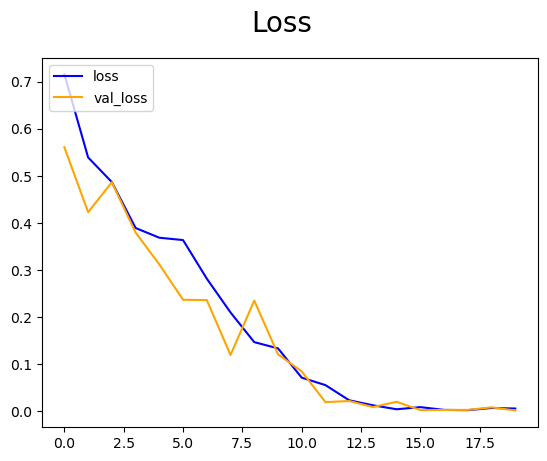

In [63]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

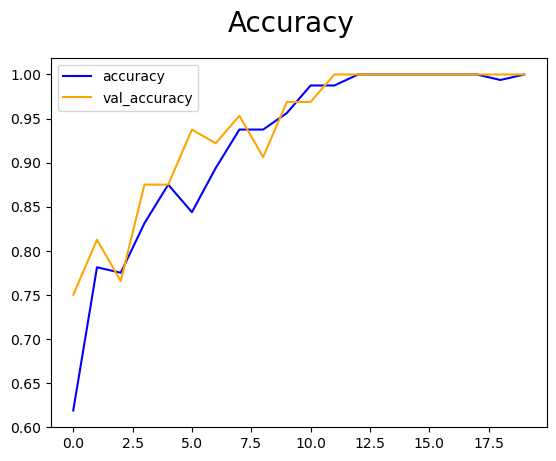

In [64]:
 fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluating Model

In [65]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [66]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [67]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 371ms/step


In [68]:
print(f'Precision:{pre.result().numpy()}\nRecall:{re.result().numpy()}\nAccuracy:{acc.result().numpy()}\n')

Precision:0.0
Recall:0.0
Accuracy:1.0



### Testing our Model

In [69]:
import cv2

Loading of image dataset to get tested

In [70]:
img=cv2.imread(os.path.join('ImageDataset','negative','21.jpg'))

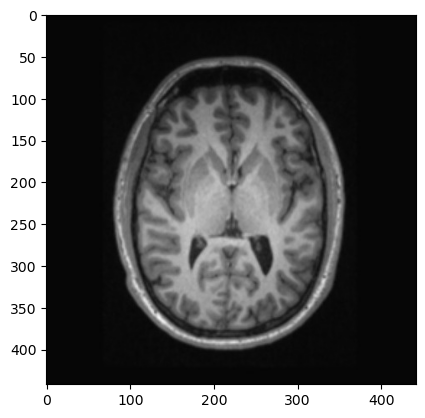

In [71]:
plt.imshow(img)
plt.show()

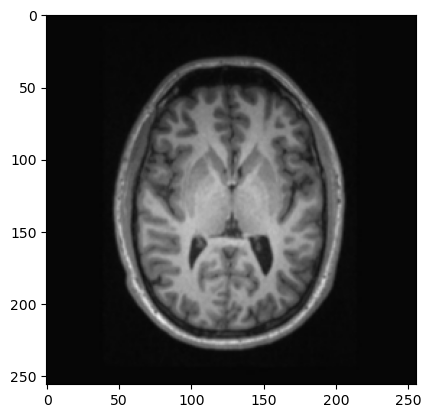

In [72]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
np.expand_dims(resize,0)

array([[[[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.],
         ...,
         [6., 6., 6.],
         [6., 6., 6.],
         [5., 5., 5.]],

        [[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.],
         ...,
         [6., 6., 6.],
         [6., 6., 6.],
         [5., 5., 5.]],

        [[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.],
         ...,
         [6., 6., 6.],
         [6., 6., 6.],
         [5., 5., 5.]],

        ...,

        [[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.],
         ...,
         [6., 6., 6.],
         [6., 6., 6.],
         [5., 5., 5.]],

        [[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.],
         ...,
         [6., 6., 6.],
         [6., 6., 6.],
         [5., 5., 5.]],

        [[5., 5., 5.],
         [5., 5., 5.],
         [5., 5., 5.],
         ...,
         [6., 6., 6.],
         [6., 6., 6.],
         [5., 5., 5.]]]], dtype=float32)

In [74]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        ...,
        [6., 6., 6.],
        [6., 6., 6.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        ...,
        [6., 6., 6.],
        [6., 6., 6.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        ...,
        [6., 6., 6.],
        [6., 6., 6.],
        [5., 5., 5.]],

       ...,

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        ...,
        [6., 6., 6.],
        [6., 6., 6.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        ...,
        [6., 6., 6.],
        [6., 6., 6.],
        [5., 5., 5.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        ...,
        [6., 6., 6.],
        [6., 6., 6.],
        [5., 5., 5.]]], dtype=float32)>

In [75]:
resize.shape

TensorShape([256, 256, 3])

In [76]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [77]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 94ms/step


In [78]:
yhat

array([[4.10822e-05]], dtype=float32)

yhat < 0.5 = BRAIN WITHOUT TUMOR ------------- yhat > 0.5 = BRAIN WITH TUMOR

In [79]:
print(f'if {yhat} Value\n:-Closer to 1,then model predictsBRAIN WITH TUMOR\nif {yhat} value is closer to 0, then model predicts BRAIN WITHOUT TUMOR')

if [[4.10822e-05]] Value
:-Closer to 1,then model predictsBRAIN WITH TUMOR
if [[4.10822e-05]] value is closer to 0, then model predicts BRAIN WITHOUT TUMOR


# RESULTS

In [80]:
if yhat>0.5:
    print("Predicted class is BRAIN WITH TUMOR")
else:
    print("Predicted class is BRAIN WITHOUT TUMOR")

Predicted class is BRAIN WITHOUT TUMOR
